In [0]:
import tensorflow as tf
from six.moves import cPickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [0]:
train_imgs=mnist.train.images
train_labels=mnist.train.labels

test_imgs=mnist.test.images
test_labels=mnist.test.labels

In [0]:
def encoder(x):
  with tf.variable_scope('lstm1'):
    lstm1=tf.nn.rnn_cell.BasicLSTMCell(num_units=112)
    h1,c1=tf.nn.dynamic_rnn(lstm1,inputs=x,dtype=tf.float32)
  with tf.variable_scope('lstm2'):
    lstm2=tf.nn.rnn_cell.BasicLSTMCell(num_units=56)
    h2,c2=tf.nn.dynamic_rnn(lstm2,inputs=h1,dtype=tf.float32)
  with tf.variable_scope('lstm3'):
    lstm3=tf.nn.rnn_cell.BasicLSTMCell(num_units=28)
    h3,c3=tf.nn.dynamic_rnn(lstm3,inputs=h2,dtype=tf.float32)
  
  return tf.reshape(h3[:,-1,:],(-1,28,1)),h1,h2

In [0]:
def decoder(x):
  with tf.variable_scope('lstm4'):
    lstm4=tf.nn.rnn_cell.BasicLSTMCell(num_units=14)
    h4,c4=tf.nn.dynamic_rnn(lstm4,inputs=x,dtype=tf.float32)

    
  with tf.variable_scope('lstm5'):
    lstm5=tf.nn.rnn_cell.BasicLSTMCell(num_units=28)
    h5,c5=tf.nn.dynamic_rnn(lstm5,inputs=h4,dtype=tf.float32)

  
  return h5[:,:,:]

In [0]:
x=tf.placeholder(tf.float32,[None,28,28])

In [0]:
def get_batch(images,labels,batch_size=64):
  idx=np.random.choice(images.shape[0],batch_size)
  return images[idx],labels[idx]

In [8]:
enc,h1,h2=encoder(x)
print(enc.get_shape())
print(h1.get_shape())
print(h2.get_shape())
dec=decoder(enc)

loss=tf.square(x-dec)
loss=tf.reduce_mean(loss)

opt=tf.train.AdamOptimizer(0.0001).minimize(loss)
sess=tf.Session()
sess.run(tf.global_variables_initializer())

Instructions for updating:
This class is equivalent as tf.keras.layers.LSTMCell, and will be replaced by that in Tensorflow 2.0.
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Colocations handled automatically by placer.
(?, 28, 1)
(?, 28, 112)
(?, 28, 56)


In [42]:
for i in range(10000):
  train_x,_=get_batch(train_imgs.reshape(-1,28,28),train_labels)
  _,l=sess.run([opt,loss],feed_dict={x:train_x})
  if i%100==0:
    print(l)

0.06407712
0.060925804
0.060437053
0.058488604
0.06135343
0.05922368
0.06228056
0.060470436
0.06210333
0.063123375
0.058472615
0.060277764
0.05828904
0.05912348
0.057164498
0.056969028
0.057508506
0.056013145
0.057856347
0.05604715
0.05735089
0.05610136
0.05379022
0.055390026
0.053263646
0.05229621
0.055082817
0.050720926
0.054335207
0.049526837
0.050932165
0.05348053
0.051629946
0.04895456
0.05563303
0.052976318
0.050051607
0.053768683
0.04716447
0.051553294
0.052052733
0.051948447
0.050181437
0.054238748
0.046715222
0.048699643
0.047524404
0.04931328
0.048647646
0.046431173
0.046475567
0.044533465
0.046038363
0.049997583
0.046116587
0.04789496
0.045557894
0.049227256
0.04715286
0.04459163
0.046673965
0.043702416
0.047288496
0.04250061
0.04478261
0.04477603
0.045892064
0.042324796
0.045194287
0.0454205
0.04717272
0.040819645
0.04283566
0.045174267
0.04200769
0.045029834
0.04080654
0.044735547
0.04211761
0.04319592
0.043765306
0.042739592
0.0464382
0.04562046
0.043092724
0.044886272
0.

In [39]:
#print(test_imgs.reshape(-1,28,28))
test_img,_=get_batch(test_imgs.reshape(-1,28,28),test_labels,1)

dec_test=sess.run(dec,feed_dict={x:test_img})
print(dec_test.shape)

(1, 28, 28)


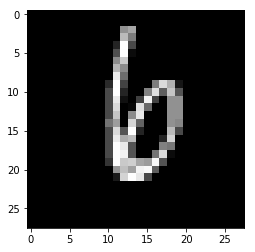

In [40]:
plt.imshow(test_img.reshape(28,28),'gray')

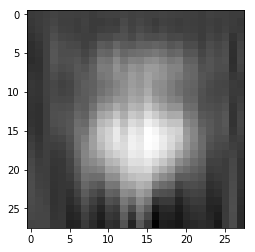

In [41]:
plt.imshow(dec_test.reshape(28,28),'gray')